In [1]:
import adsb_util
import matplotlib.pyplot as plt



In [2]:
flightVectors = adsb_util.pfs('adsb_data/20181210_jfk24h')

In [3]:
flightDf = adsb_util.tdf(flightVectors)

In [4]:
flightDf.head()


Id        Lat       Long     Flighttime    Stationtime  Latency  \
0  10530047  40.794000 -74.089100  1544457946729  1544457951277     4548   
1  10530047  40.803100 -74.101700  1544458052704  1544458081476    28772   
2  10530047  40.718591 -74.140611  1544493754685  1544493763432     8747   
3  10530047  40.718591 -74.140611  1544493754862  1544493828427    73565   
4  10530047  40.826359 -74.079874  1544534839419  1544534846121     6702   

   Altitude  
0      2775  
1      2800  
2      2200  
3      3800  
4      2425

In [5]:
flightDf = adsb_util.clean(flightDf)
flightDf[flightDf.Latency > 0].count()

Id             37562
Lat            37562
Long           37562
Flighttime     37562
Stationtime    37562
Latency        37562
Altitude       37562
dtype: int64

In [6]:
flightDf.describe()

Id           Lat          Long    Flighttime   Stationtime  \
count  3.756200e+04  37562.000000  37562.000000  3.756200e+04  3.756200e+04   
mean   1.044155e+07     40.666410    -73.841964  1.544495e+12  1.544496e+12   
std    2.052624e+06      0.105522      0.147512  2.552420e+07  2.595595e+07   
min    4.529400e+04     40.345893    -74.170349  1.544450e+12  1.544458e+12   
25%    1.063165e+07     40.628157    -73.930374  1.544474e+12  1.544475e+12   
50%    1.095943e+07     40.648320    -73.823743  1.544489e+12  1.544490e+12   
75%    1.127764e+07     40.746755    -73.769276  1.544513e+12  1.544522e+12   
max    1.522084e+07     40.938200    -73.391200  1.544544e+12  1.544544e+12   

            Latency       Altitude  
count  3.756200e+04   37562.000000  
mean   1.010588e+06    5007.378308  
std    3.652108e+06   11675.777836  
min    1.000000e+00   -1200.000000  
25%    1.421000e+03    -175.000000  
50%    5.530000e+03    1200.000000  
75%    8.900300e+04    4175.000000  
max    3.951185e+07  123400.000000

In [7]:
flightDf['Latency'].max()

39511848

<AxesSubplot:>

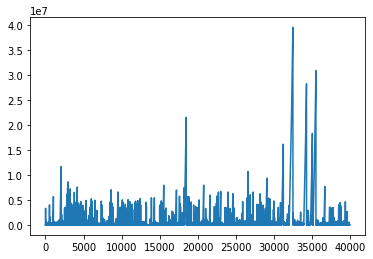

In [8]:
flightDf['Latency'].plot()

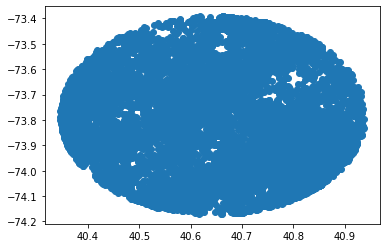

In [9]:
plt.scatter(flightDf['Lat'], flightDf['Long'])
plt.show()

In [10]:
# Plot of atltitude and latency

altDf = flightDf[['Altitude', 'Latency']]
print(altDf[altDf.Altitude > 0].count())
altDf = altDf[altDf.Altitude > 0] 
altDf.describe()


Altitude    24304
Latency     24304
dtype: int64


Altitude       Latency
count   24304.000000  2.430400e+04
mean     7839.745351  9.383168e+05
std     13709.916466  3.870336e+06
min        17.000000  1.000000e+00
25%      1275.000000  9.350000e+02
50%      2775.000000  2.663000e+03
75%      8100.000000  1.032400e+04
max    123400.000000  3.567781e+07

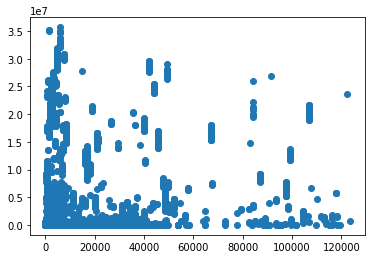

In [11]:
plt.scatter(altDf['Altitude'], altDf['Latency'])
plt.show()
# Random distribution

In [12]:
def cov(df, fx, fy):
    ux = df[fx].mean()
    uy = df[fy].mean()

    return ((df[fx] - ux) * (df[fy] - uy)).mean()

def rho(df, fx, fy):
    return cov(df, fy, fx)/(df[fx].var() * df[fy].var())




In [13]:

# There is no correlation between 'Altitude' and 'Latency'
cov(altDf, 'Altitude', 'Latency')
rho(altDf, 'Altitude', 'Latency')



5.079632092067935e-12